## MNIST DATASET USING PYTORCH

In [14]:
import torch
import torchvision
from tqdm import tqdm
from torchvision import transforms, datasets

In [15]:
train = datasets.MNIST("../datasets/", train=True, download=True, 
                        transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("../datasets/", train=False, download=True, 
                        transform=transforms.Compose([transforms.ToTensor()]))

In [16]:
trainset = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)

In [17]:
total = 0
counter_dict = { 0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0 }

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [18]:
for i in counter_dict:
    print(f"{i} : { (counter_dict[i]/total)*100 }")

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [19]:
import torch.nn as nn 
import torch.nn.functional as F

In [20]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [21]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28)
output = net(X)

In [22]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 4

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()

    print(loss)

tensor(0.1967, grad_fn=<NllLossBackward0>)
tensor(0.1341, grad_fn=<NllLossBackward0>)
tensor(0.0853, grad_fn=<NllLossBackward0>)
tensor(0.0660, grad_fn=<NllLossBackward0>)


In [23]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print(f"Accuracy: {round(correct/total, 3)}")

    

Accuracy: 0.983


58.59375


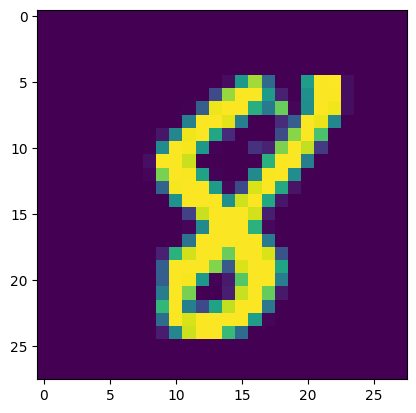

tensor(8)


In [24]:
import matplotlib.pyplot as plt

print(len(trainset)/32)
idx = 31

plt.imshow(X[idx].view(28, 28))
plt.show()

print(torch.argmax(net(X[idx].view(-1, 784))[0]))